# In this notebook I do the data analysis and the plots for the TOF TOMO paper

In [29]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import io
import TOF_routines
from TOF_routines import l2tof, tof2l
from TOF_routines import find_nearest
from astropy.io import fits
from matplotlib_scalebar.scalebar import ScaleBar
from brokenaxes import brokenaxes
import matplotlib.gridspec as gridspec
import AdvancedBraggEdgeFitting_v2
from sklearn.metrics import mean_squared_error
import tifffile
from tifffile import TiffFile
import math

In [2]:
# This are the images without BB correction
nBins=165 
spectrum_img=np.zeros((476,476,nBins))
print(np.shape(spectrum_img))
for i in range (0, nBins):
    filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_update\\bin'+str(i).zfill(4)+'\slice_0310.tif'
    spectrum_img[:,:,i]=io.imread(filename)
#     print(filename)

(476, 476, 165)


In [43]:
# I now load the images with BB correction
nBins=165 
spectrum_img_BB=np.zeros((476,476,nBins))
print(np.shape(spectrum_img_BB))
for i in range (0, nBins):
    filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose\\bin'+str(i).zfill(4)+'\slice_0310.tif'
    spectrum_img_BB[:,:,i]=io.imread(filename)
#     print(filename)

(476, 476, 165)


In [ ]:
# I now load the images with BB - sample correction 5%
nBins=165 
spectrum_img_BB=np.zeros((476,476,nBins))
print(np.shape(spectrum_img_BB))
for i in range (0, nBins):
    filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose_SampleScattering\\bin'+str(i).zfill(4)+'\slice_0310.tif'
    spectrum_img_BB[:,:,i]=io.imread(filename)
#     print(filename)

In [40]:
# I now load the images with BB - sample correction 7%
nBins=165 
spectrum_img_BB=np.zeros((476,476,nBins))
print(np.shape(spectrum_img_BB))
for i in range (0, nBins):
    filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose_SampleScat_7percent\\bin'+str(i).zfill(4)+'\slice_0310.tif'
    spectrum_img_BB[:,:,i]=io.imread(filename)
#     print(filename)

(476, 476, 165)


In [15]:
nBins=165 
spectrum_IMAT=np.zeros((512,512,nBins))
print(np.shape(spectrum_IMAT))
for i in range (0, nBins):
#     filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const\\bin'+str(i).zfill(4)+'\slice_0405.tif'
    filename = 'D:/Kaestner/ISIS_IAEAData/RB1730015/Tomo_test_RB1730044/OpenBeam_aft3_Corrected_Binned/IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
    with fits.open(filename) as f:
        spectrum_IMAT[:,:,i]=f[0].data

(512, 512, 165)


In [41]:
Ti = np.zeros(nBins)
Fe = np.zeros(nBins)
Pb = np.zeros(nBins)
Ni = np.zeros(nBins)
Cu = np.zeros(nBins)
Al = np.zeros(nBins)
Ti_BB = np.zeros(nBins)
Fe_BB = np.zeros(nBins)
Pb_BB = np.zeros(nBins)
Ni_BB = np.zeros(nBins)
Cu_BB = np.zeros(nBins)
Al_BB = np.zeros(nBins)

for i in range(0,nBins):
    Ti[i] = np.median(spectrum_img[150:200,80:130,i])
    Pb[i] = np.median(spectrum_img[50:100,200:250,i])
    Fe[i] = np.median(spectrum_img[300:350, 80:130,i])
    Cu[i] = np.median(spectrum_img[130:180,350:400,i])
    Ni[i] = np.median(spectrum_img[380:430,230:280,i])
    Al[i] = np.median(spectrum_img[280:330,330:380,i])
    Ti_BB[i] = np.median(spectrum_img_BB[150:200,80:130,i])
    Pb_BB[i] = np.median(spectrum_img_BB[50:100,200:250,i])
    Fe_BB[i] = np.median(spectrum_img_BB[300:350, 80:130,i])
    Cu_BB[i] = np.median(spectrum_img_BB[130:180,350:400,i])
    Ni_BB[i] = np.median(spectrum_img_BB[380:430,230:280,i])
    Al_BB[i] = np.median(spectrum_img_BB[280:330,330:380,i])
    
    

----- used ROIs -----


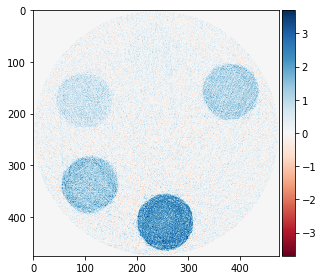

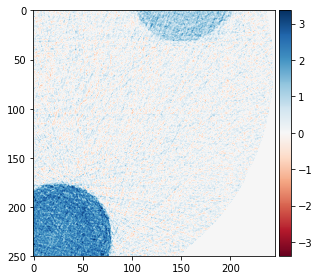

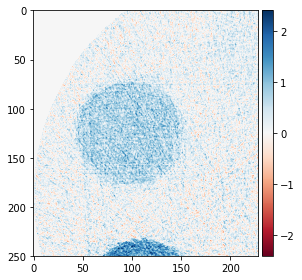

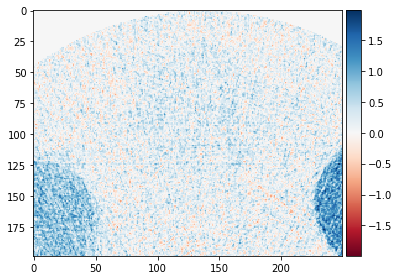

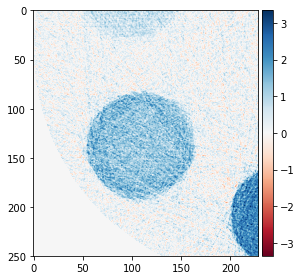

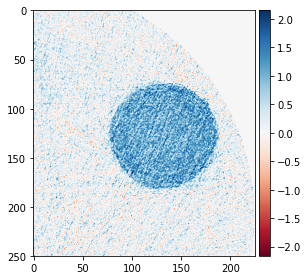

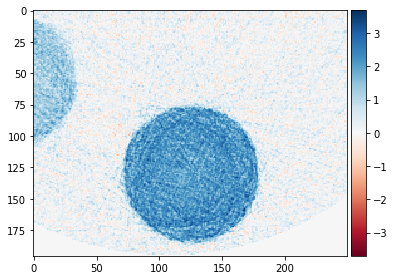

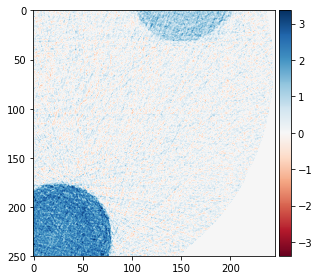

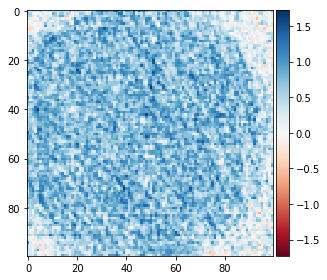

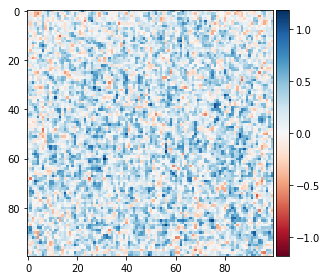

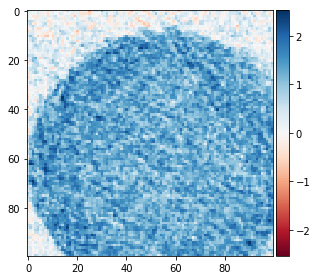

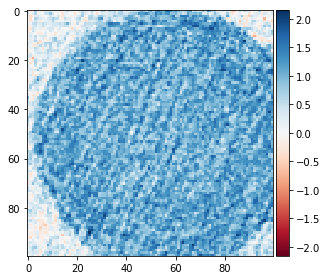

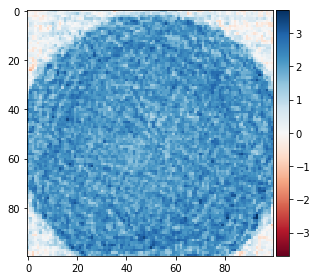

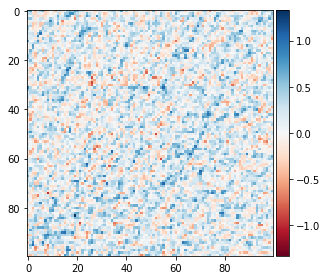

In [7]:
plt.figure()
io.imshow(spectrum_img[:,:,100])

plt.figure()
io.imshow(spectrum_img[280-100:330+100,330-100:380+100,100])

plt.figure()
io.imshow(spectrum_img[150-100:200+100,80-79:130+100,100])

plt.figure()
io.imshow(spectrum_img[50-49:100+100,200-100:250+100,100])

plt.figure()
io.imshow(spectrum_img[300-100:350+100, 80-79:130+100,100])

plt.figure()
io.imshow(spectrum_img[130-100:180+100,350-100:400+100,100])

plt.figure()
io.imshow(spectrum_img[380-100:430+100,230-100:280+100,100])

plt.figure()
io.imshow(spectrum_img[280-100:330+100,330-100:380+100,100])




print('----- used ROIs -----')

plt.figure()
io.imshow(spectrum_img[150-25:200+25,80-25:130+25,100])

plt.figure()
io.imshow(spectrum_img[50-25:100+25,200-25:250+25,100])

plt.figure()
io.imshow(spectrum_img[300-25:350+25, 80-25:130+25,100])

plt.figure()
io.imshow(spectrum_img[130-25:180+25,350-25:400+25,100])

plt.figure()
io.imshow(spectrum_img[380-25:430+25,230-25:280+25,100])

plt.figure()
io.imshow(spectrum_img[280-25:330+25,330-25:380+25,100])

In [18]:
myTOF = np.genfromtxt('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\Sample\\angle0\IMAT00004675_Tomo_test_000_Spectra.txt', usecols=0)
t0 =  0.0
L = 56
h=6.62607004e-34 #Planck constant [m^2 kg / s]
m=1.674927471e-27 #Neutron mass [kg]
lambda0=0
myLambda =tof2l(myTOF, lambda0,t0,L)
lambda_bin = myLambda[1::18]

In [19]:
filename ="Cu.txt"
data_Cu = np.genfromtxt(filename)
print(np.shape(data_Cu))

data_Fe = np.genfromtxt('Fe.txt')
data_Pb=np.genfromtxt('Pb.txt')
data_Ti=np.genfromtxt('Ti.txt')
data_Ni=np.genfromtxt('Ni.txt')
data_Al = np.genfromtxt('Al.txt')

(300, 2)


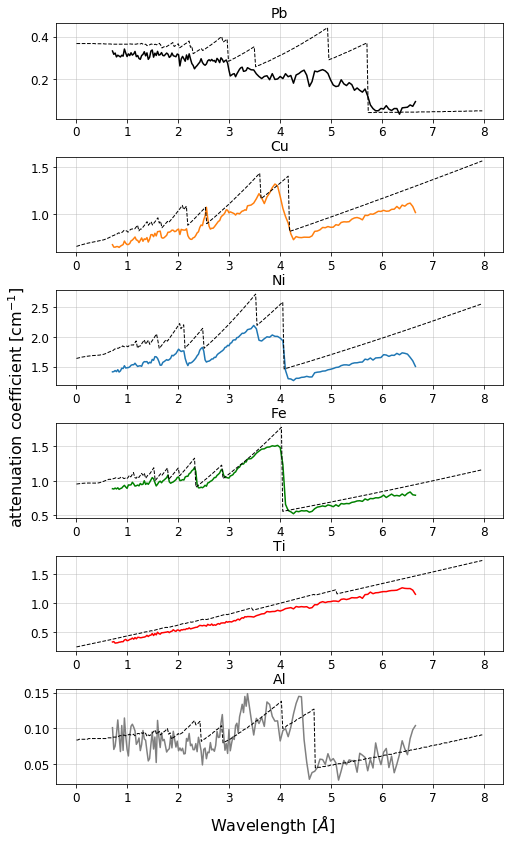

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 14))

plt.subplot(611)
plt.plot(lambda_bin, Pb, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(612)
plt.plot(lambda_bin, Cu, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(613)
plt.plot(lambda_bin, Ni)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.subplot(614)
plt.plot(lambda_bin, Fe,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(615)
plt.plot(lambda_bin, Ti,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(616)
plt.plot(lambda_bin, Al, 'gray')
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1)
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplots_adjust(hspace=0.4)
fig.text(0.5, 0.08, 'Wavelength [$\AA$]', ha='center',fontsize=16)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=16)

# plt.savefig('spectra_plots.tiff')
plt.savefig('spectra_plots_NOBB.png', dpi=500)
# plt.savefig('spectra_plots.pdf')

129
[1.42100799 1.41951925 1.43441093 1.42738026 1.44086045 1.41669989
 1.4283396  1.4563638  1.47592711 1.52459264 1.48186082 1.49109644
 1.49997944 1.50349182 1.52632898 1.53537697 1.53887516 1.56579757
 1.54513884 1.51219845 1.52641517 1.51422012 1.52024585 1.56286079
 1.59629756 1.58096796 1.59674728 1.54760933 1.56986582 1.56174582
 1.63842475 1.60755849 1.66758364 1.65808624 1.63601673 1.59414679
 1.52509618 1.53229243 1.56864446 1.58930385 1.61892051 1.59766263
 1.61549121 1.63619339 1.69076407 1.67453843 1.69151455 1.71621037
 1.74753326 1.79434055 1.76416773 1.75168961 1.75916862 1.75968683
 1.63344002 1.56324136 1.5158     1.55432445 1.55112553 1.56917429
 1.58861029 1.60765618 1.63939065 1.67866057 1.70701844 1.77029699
 1.79288656 1.81538767 1.75613433 1.60884023 1.57054389 1.58310711
 1.5892694  1.59987718 1.62191725 1.61975694 1.65562624 1.65554821
 1.6894666  1.71398312 1.72360241 1.74110633 1.75825721 1.78206581
 1.81633902 1.82441318 1.84601498 1.84165722 1.88406926 1.

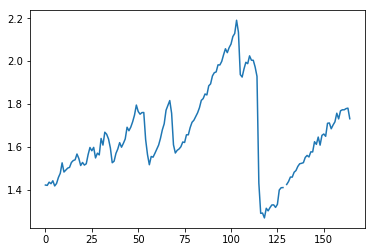

In [39]:
# This is to check the presence of nan in the files
# plt.figure()
# plt.plot(Ni_BB)
# for i in range(0,155):
#     if (math.isnan(Ni_BB[i])):
#         print(i)

# print(Ni_BB) 

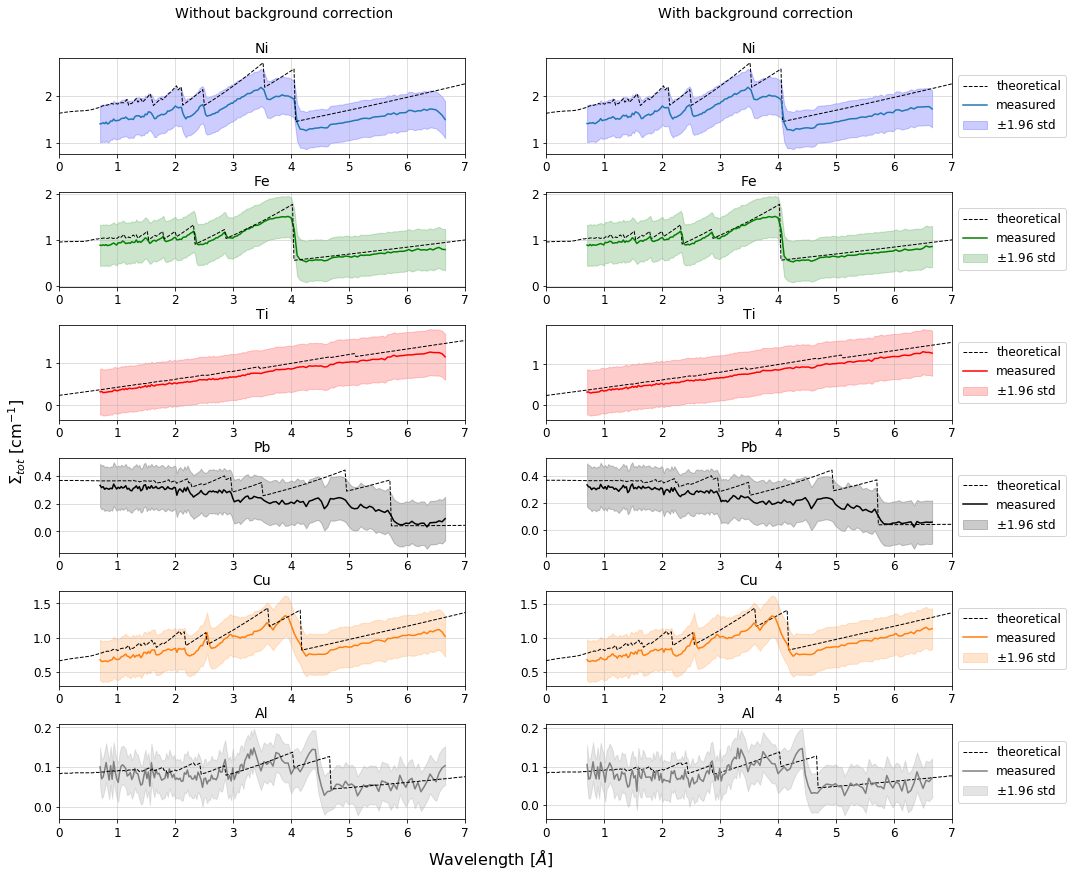

In [42]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(16, 14))

plt.subplot(621)
plt.plot(lambda_bin, Ni)
plt.fill_between(lambda_bin, Ni-1.96*np.std(Ni), Ni+1.96*np.std(Ni), color='b', alpha=0.2)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax1 = plt.subplot(622)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1,label='theoretical')
plt.plot(lambda_bin, Ni_BB, label='measured')
plt.fill_between(lambda_bin, Ni_BB-1.96*np.std(Ni_BB), Ni_BB+1.96*np.std(Ni_BB), color='b', alpha=0.2, label='$\pm$1.96 std')
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg1 = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax2 = plt.subplot(624)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Fe_BB,'g', label='measured')
plt.fill_between(lambda_bin, Fe_BB-1.96*np.std(Fe_BB), Fe_BB+1.96*np.std(Fe_BB), color='g', alpha=0.2, label='$\pm$1.96 std')
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg2 = ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.subplot(623)
plt.plot(lambda_bin, Fe,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Fe-1.96*np.std(Fe), Fe+1.96*np.std(Fe), color='g', alpha=0.2)
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax3 = plt.subplot(626)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Ti_BB,'r', label='measured')
plt.fill_between(lambda_bin, Ti_BB-1.96*np.std(Ti_BB), Ti_BB+1.96*np.std(Ti_BB), color='r', alpha=0.2, label='$\pm$1.96 std')
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg3 = ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.subplot(625)
plt.plot(lambda_bin, Ti,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Ti-1.96*np.std(Ti), Ti+1.96*np.std(Ti), color='r', alpha=0.2)
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax4 = plt.subplot(628)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Pb_BB, 'k', label='measured')
plt.fill_between(lambda_bin, Pb_BB-1.96*np.std(Pb_BB), Pb_BB+1.96*np.std(Pb_BB), color='k', alpha=0.2, label='$\pm$1.96 std')
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg4 = ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.subplot(627)
plt.plot(lambda_bin, Pb, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Pb-1.96*np.std(Pb), Pb+1.96*np.std(Pb), color='k', alpha=0.2)
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax5 = plt.subplot(6,2,10)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Cu_BB, 'C1', label='measured')
plt.fill_between(lambda_bin, Cu_BB-1.96*np.std(Cu_BB), Cu_BB+1.96*np.std(Cu_BB), color='C1', alpha=0.2, label='$\pm$1.96 std')
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg5 = ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.subplot(629)
plt.plot(lambda_bin, Cu, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Cu-1.96*np.std(Cu), Cu+1.96*np.std(Cu), color='C1', alpha=0.2)
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax6 = plt.subplot(6,2,12)
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Al_BB, 'gray', label='measured')
plt.fill_between(lambda_bin, Al_BB-1.96*np.std(Al_BB), Al_BB+1.96*np.std(Al_BB), color='gray', alpha=0.2, label='$\pm$1.96 std')
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg6 = ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)


plt.subplot(6,2,11)
plt.plot(lambda_bin, Al, 'gray')
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Al-1.96*np.std(Al), Al+1.96*np.std(Al), color='gray', alpha=0.2)
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])


plt.subplots_adjust(hspace=0.4)
text_x = fig.text(0.5, 0.08, 'Wavelength [$\AA$]', ha='center',fontsize=16)
text_y = fig.text(0.08, 0.5, '$\Sigma_{tot}$ [cm$^{-1}$]', va='center', rotation='vertical', fontsize=16)
title_1 = fig.text(0.32, 0.92, 'Without background correction', ha='center',fontsize=14)
title_2 = fig.text(0.73, 0.92, 'With background correction', ha='center',fontsize=14)
# plt.savefig('spectra_plots_BB_dose_50x50.png', dpi=500)
plt.savefig('spectra_plots_BB_andNOT_dose_50x50_NEW.pdf',bbox_extra_artists=(lg1,lg2,lg3,lg4,lg5,lg6, text_x,text_y,title_1,title_2), bbox_inches='tight')

In [ ]:
spectrum = np.zeros(nBins)
for i in range(0,nBins):
    spectrum[i] = np.median(spectrum_IMAT[:,:,i])

In [ ]:
# Here I compensate for the different 

# plt.figure()
# plt.plot(lambda_bin,'.')
# plt.figure()
# plt.plot(lambda_bin, spectrum)

spectrum_proc = np.zeros(nBins)

for i in range(0,nBins):
    
    if i<101:
        spectrum_proc[i] = spectrum[i]
    else:
        spectrum_proc[i] = spectrum[i]/2.0


print(np.shape(spectrum_proc))

spectrum_proc[101] = (spectrum_proc[100]+spectrum_proc[102])/2

plt.figure()
plt.plot(lambda_bin, spectrum_proc/np.max(spectrum_proc))

In [ ]:
# Expected Attenuation coefficients for the white beam tomo
spectrum_norm = spectrum_proc/np.max(spectrum_proc)
data_Ti[:,1]
pos1 = find_nearest(data_Ti[:,0], 0.7)
pos2 = find_nearest(data_Ti[:,0], 6.7)
print(pos1,pos2)

att_Ti = 0
att_Ni = 0
att_Fe = 0
att_Pb = 0
att_Cu = 0
att_Al = 0

for i in range(0, nBins):
    pos = find_nearest(data_Ti[:,0], lambda_bin[i])
    att_Ti += data_Ti[pos,1]*spectrum_norm[i]
    att_Ni += data_Ni[pos,1]*spectrum_norm[i]
    att_Fe += data_Fe[pos,1]*spectrum_norm[i]
    att_Pb += data_Pb[pos,1]*spectrum_norm[i]
    att_Cu += data_Cu[pos,1]*spectrum_norm[i]
    att_Al += data_Al[pos,1]*spectrum_norm[i]

print(att_Ti)
print('Ti: ', att_Ti/np.sum(spectrum_norm))
print('Ni: ', att_Ni/np.sum(spectrum_norm))
print('Fe: ', att_Fe/np.sum(spectrum_norm))
print('Cu: ', att_Cu/np.sum(spectrum_norm))
print('Pb: ', att_Pb/np.sum(spectrum_norm))
print('Al: ', att_Al/np.sum(spectrum_norm))
# print(np.sum(data_Ti[pos1:pos2,1])/(pos2-pos1))
# print(np.sum(Ti)/len(Ti))
# print(np.sum(Ti_BB)/len(Ti_BB))

# print(np.sum(data_Ti[pos1:pos2,1]*spectrum_norm)/(pos2-pos1))



In [ ]:
print(np.sum(Ti_BB)/len(Ti_BB))
print(np.sum(Ti)/len(Ti))
print(np.sum(data_Ti[pos1:pos2,1])/(pos2-pos1))

In [ ]:
img_WB=io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam\slice_0405.tif')
img_WB_BB=io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constValue_05pc\slice_0405.tif')
img_WB_BB_10pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constValue_10pc\slice_0405.tif')
img_WB_BB_20pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constValue_20pc\slice_0405.tif')
img_WB_BB_01pc = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constValue_01pc\slice_0405.tif')
# the analysis of I actually did on ImageJ.. shame on me. (mean and standard deviation of the mean attenuation coefficients)

img_WB_BB_rot = io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected_constValue_05pc\\rotated\slice_0405.tif')
plt.figure()
cs=plt.imshow(img_WB, cmap='gray',vmin=0.0, vmax=2.1)
plt.axis('off')
plt.colorbar(cs)


scalebar = ScaleBar(0.000055) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)
plt.tight_layout()
plt.savefig('WhiteBeam.png', dpi=600) # This is also to be updated as i
# scalebar = AnchoredSizeBar(plt.get_axis, 0.055,'mm','upper right')

# plt.add_artist(scalebar)

plt.figure()
cs=plt.imshow(img_WB_BB_rot, cmap='gray',vmin=0.0, vmax=2.1)
plt.axis('off')
plt.colorbar(cs)
scalebar2 = ScaleBar(0.000055) 
plt.gca().add_artist(scalebar2)
plt.tight_layout()
plt.savefig('WhiteBeam_BB.png', dpi=600) # This is also to be updated as i
plt.savefig('WhiteBeam_BB.pdf')

In [ ]:
# Here I add a bar plot with the attenuation coefficients for all background tested. 
Ni_AC = np.array([2.04,  1.687, 1.731, 1.973, 2.43])
Fe_AC = np.array([1.090, 0.968, 0.988, 1.093, 1.278])
Ti_AC = np.array([0.796, 0.718, 0.726, 0.792, 0.898])
Pb_AC = np.array([0.336, 0.223, 0.220, 0.235, 0.244])
Cu_AC = np.array([1.044, 0.923, 0.938, 1.03, 1.197])
Al_AC = np.array([0.094, 0.072, 0.07, 0.066, 0.004])

Ni_std = np.array([0, 0.103, 0.103,0.120,0.162])
Fe_std = np.array([0, 0.093, 0.096, 0.107, 0.130])
Ti_std = np.array([0, 0.091, 0.095, 0.103, 0.122])
Pb_std = np.array([0, 0.087, 0.09, 0.090, 0.110])
Cu_std = np.array([0, 0.093, 0.093, 0.103, 0.125])
Al_std = np.array([0, 0.087, 0.092, 0.097, 0.105])



In [ ]:
ax = plt.figure(figsize=[9,4])
x_Ni =np.arange(0,10,2)
x_Fe = np.arange(11,21,2)
x_Ti = np.arange(23,33,2)
x_Pb = np.arange(35,45,2)
x_Cu = np.arange(47,57,2)
x_Al = np.arange(59,69,2)
#  , "+" , "x", "o", "O", ".", "*" 
patterns = [ "", "", "//" , "\\" , "-" ]
label = ['theoretical','no correction', '1%','5%','10%']
colors =['darkgray','white','skyblue','mediumseagreen','orange']
for i in range(0,5):
    plt.bar(x_Ni[i], Ni_AC[i],width=1.7, yerr = Ni_std[i], color=colors[i], edgecolor='k', label=label[i])
    plt.bar(x_Fe[i], Fe_AC[i], width=1.7,yerr= Fe_std[i], color=colors[i], edgecolor='k')
    plt.bar(x_Ti[i], Ti_AC[i], width=1.7,yerr= Ti_std[i],  color=colors[i], edgecolor='k')
    plt.bar(x_Pb[i], Pb_AC[i],width=1.7, yerr = Pb_std[i],  color=colors[i], edgecolor='k')
    plt.bar(x_Cu[i], Cu_AC[i], width=1.7,yerr = Cu_std[i],  color=colors[i], edgecolor='k')
    plt.bar(x_Al[i], Al_AC[i], width=1.7,yerr = Al_std[i],  color=colors[i], edgecolor='k')

plt.legend(fontsize=11)
labels = ['Ni','Fe', 'Ti', 'Pb', 'Cu', 'Al']
plt.xticks([4,15,27,39, 51,63],labels, fontsize=12)
plt.ylabel('Attenuation coefficients [cm$^{-1}$]', fontsize=14)
plt.savefig("WhiteBeam_AC.pdf")


In [ ]:
plt.subplots(figsize=(7,6))
ax1 = plt.subplot(211)
plt.plot(lambda_bin, spectrum_proc/np.max(spectrum_proc), label='IMAT spectrum')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Relative intensity [a.u.]', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(data_Ni[:,0], data_Ni[:,1], c='b', label='Ni (fcc)')
plt.plot(data_Fe[:,0], data_Fe[:,1], c='g', label='Fe (bcc)')
plt.plot(data_Ti[:,0], data_Ti[:,1], c='r', label='Ti (hcp)')
plt.plot(data_Pb[:,0], data_Pb[:,1], c='k', label='Pb (fcc)')
plt.plot(data_Cu[:,0], data_Cu[:,1], c='C1',label='Cu (fcc)')
plt.plot(data_Al[:,0], data_Al[:,1], c='gray', label='Al (fcc)')
plt.grid(alpha=0.5)
plt.legend(loc='right', fontsize=12)

plt.xlabel('Wavelength [$\AA$]', fontsize=14)
plt.ylabel('$\Sigma_{tot}$[$cm^{-1}$]', fontsize=14)
plt.subplots_adjust(hspace=0.05)

plt.savefig('IMAT_spectrum_And_Thoretical.png', dpi=600)
plt.savefig('IMAT_spectrum_And_Thoretical.pdf')

In [ ]:
# tosave = np.concatenate(lambda_bin, spectrum_proc,axis=1)
print(np.shape(lambda_bin), np.shape(spectrum_proc))
tosave =np.stack((lambda_bin[:], spectrum_proc[:]), axis=1)
print(np.shape(tosave))
np.savetxt('IMAT_spectrum.txt', tosave)


### Analysis voxel-based for the paper 

In [ ]:
Ti_BB_image = spectrum_img_BB[150:200,80:130,:]
Pb_BB_image = spectrum_img_BB[50:100,200:250,:]
Fe_BB_image = spectrum_img_BB[300:350, 80:130,:]
Cu_BB_image = spectrum_img_BB[130:180,350:400,:]
Ni_BB_image = spectrum_img_BB[380:430,230:280,:]
Al_BB_image = spectrum_img_BB[280:330,330:380,:]

In [ ]:
print(np.shape(Ti_BB_image))

fig, axes = plt.subplots(6,figsize=(8,12),sharex=True, sharey=True)

c1 = axes[0].imshow(Ni_BB_image[:,25,:], cmap='gray', vmin=-0.5, vmax=4.0)
cb = fig.colorbar(c1, ax=axes[0], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c2 = axes[1].imshow(Fe_BB_image[:,25,:], cmap='gray', vmin=-0.5, vmax=3.0)
cb=fig.colorbar(c2, ax=axes[1], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c3=axes[2].imshow(Ti_BB_image[:,25,:], cmap='gray', vmin=-0.5, vmax=2.0)
cb=fig.colorbar(c3, ax=axes[2], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c4=axes[3].imshow(Pb_BB_image[:,25,:], cmap='gray', vmin=-1.0, vmax=1.0)
cb=fig.colorbar(c4, ax=axes[3], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c5=axes[4].imshow(Cu_BB_image[:,25,:], cmap='gray', vmin=-0.5, vmax=2.0)
cb=fig.colorbar(c5, ax=axes[4], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c6=axes[5].imshow(Al_BB_image[:,25,:], cmap='gray', vmin=-1.0, vmax=1.0)
cb=fig.colorbar(c6, ax=axes[5], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

mylabels=np.round(lambda_bin[0::20],2)
axes[5].set_xticklabels([0.71, 0.71, 1.23, 1.77, 2.29, 2.81, 3.33, 4.37, 5.41, 6.45], fontsize=12)
# plt.subplots_adjust(wspace=0.005) # non cambia un cazzo
axes[5].set_xlabel('Wavelength [$\AA$]', fontsize=14)
# fig.text(0.04, 0.5, 'Pixel position', va='center', rotation='vertical', fontsize=14)

fig.tight_layout()
print(np.round(lambda_bin[0::20],2))
# plt.savefig('energy_slice_viridis.pdf')
plt.savefig('energy_slice_gray.pdf')


In [ ]:
Ni5x5 = np.zeros(nBins)
Fe5x5 = np.zeros(nBins)
Ti5x5 = np.zeros(nBins)
Pb5x5 = np.zeros(nBins)
Cu5x5 = np.zeros(nBins)
Al5x5 = np.zeros(nBins)

for i in range(0, nBins):

    Ni5x5[i] = np.median(Ni_BB_image[23:28,23:28,i])
    Fe5x5[i] = np.median(Fe_BB_image[23:28,23:28,i])
    Ti5x5[i] = np.median(Ti_BB_image[23:28,23:28,i])
    Pb5x5[i] = np.median(Pb_BB_image[23:28,23:28,i])
    Cu5x5[i] = np.median(Cu_BB_image[23:28,23:28,i])
    Al5x5[i] = np.median(Al_BB_image[23:28,23:28,i])

print(np.shape(Ni_BB_image[20:30,20:30,i]))


In [ ]:
resampled_Ni = np.interp(lambda_bin, data_Ni[:,0], data_Ni[:,1])
resampled_Fe = np.interp(lambda_bin, data_Fe[:,0], data_Fe[:,1])
resampled_Ti = np.interp(lambda_bin, data_Ti[:,0], data_Ti[:,1])
resampled_Pb = np.interp(lambda_bin, data_Pb[:,0], data_Pb[:,1])
resampled_Cu = np.interp(lambda_bin, data_Cu[:,0], data_Cu[:,1])
resampled_Al = np.interp(lambda_bin, data_Al[:,0], data_Al[:,1])

#RMSE OF THESE, it is probably not a good metric, as it depends on the scale of the data, and it is sensitive to outliers

rms_Ni = np.sqrt(mean_squared_error(resampled_Ni, Ni5x5))
rms_Fe = np.sqrt(mean_squared_error(resampled_Fe, Fe5x5))
rms_Ti = np.sqrt(mean_squared_error(resampled_Ti, Ti5x5))
rms_Pb = np.sqrt(mean_squared_error(resampled_Pb, Pb5x5))
rms_Cu = np.sqrt(mean_squared_error(resampled_Cu, Cu5x5))
rms_Al = np.sqrt(mean_squared_error(resampled_Al, Al5x5)) 
print(rms_Ni, rms_Fe, rms_Ti, rms_Pb, rms_Cu, rms_Al)


# normalized cross correlation
CC_Ni = np.correlate((resampled_Ni-np.mean(resampled_Ni))/(np.std(resampled_Ni)*len(resampled_Ni)), (Ni5x5-np.mean(Ni5x5))/np.std(Ni5x5))
CC_Fe = np.correlate((resampled_Fe-np.mean(resampled_Fe))/(np.std(resampled_Fe)*len(resampled_Fe)), (Fe5x5-np.mean(Fe5x5))/np.std(Fe5x5))
CC_Ti = np.correlate((resampled_Ti-np.mean(resampled_Ti))/(np.std(resampled_Ti)*len(resampled_Ti)), (Ti5x5-np.mean(Ti5x5))/np.std(Ti5x5))
CC_Pb = np.correlate((resampled_Pb-np.mean(resampled_Pb))/(np.std(resampled_Pb)*len(resampled_Pb)), (Pb5x5-np.mean(Pb5x5))/np.std(Pb5x5))
CC_Cu = np.correlate((resampled_Cu-np.mean(resampled_Cu))/(np.std(resampled_Cu)*len(resampled_Cu)), (Cu5x5-np.mean(Cu5x5))/np.std(Cu5x5))
CC_Al = np.correlate((resampled_Al-np.mean(resampled_Al))/(np.std(resampled_Al)*len(resampled_Al)), (Al5x5-np.mean(Al5x5))/np.std(Al5x5))

print(CC_Ni, CC_Fe,CC_Ti,CC_Pb, CC_Cu, CC_Al  )

In [ ]:
#This is now with the wrong error bar (std of the ROI used for computing the signal)

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 16))

ax1 = plt.subplot(611)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Ni5x5, label='measured Ni')
plt.fill_between(lambda_bin, Ni5x5-1.96*np.std(Ni5x5), Ni5x5+1.96*np.std(Ni5x5), color='b', alpha=0.2, label='$\pm$1.96 std')
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,3.2, 'NCC: '+ str(round(CC_Ni[0],3)), fontsize=11)
lg1 = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)



ax2 = plt.subplot(612)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Fe5x5,'g', label='measured Fe')
plt.fill_between(lambda_bin, Fe5x5-1.96*np.std(Fe5x5), Fe5x5+1.96*np.std(Fe5x5), color='g', alpha=0.2, label='$\pm$1.96 std')
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,2.2, 'NCC: '+ str(round(CC_Fe[0],3)), fontsize=11)

lg2 = ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax3=plt.subplot(613)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1,label='theoretical' )
plt.plot(lambda_bin, Ti5x5,'r', label='measured Ti')
plt.fill_between(lambda_bin, Ti5x5-1.96*np.std(Ti5x5), Ti5x5+1.96*np.std(Ti5x5), color='r', alpha=0.2,label='$\pm$1.96 std')
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Ti', fontsize=14)
plt.xlim([0,7])
plt.text(0.5,1.9, 'NCC: '+ str(round(CC_Ti[0],3)), fontsize=11)

lg3 = ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax4=plt.subplot(614)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1,label='theoretical')
plt.plot(lambda_bin, Pb5x5, 'k', label='meaured Pb')
plt.fill_between(lambda_bin, Pb5x5-1.96*np.std(Pb5x5), Pb5x5+1.96*np.std(Pb5x5), color='k', alpha=0.2, label='$\pm$1.96 std')
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,-0.3, 'NCC: '+ str(round(CC_Pb[0],3)), fontsize=11)

lg4 = ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax5=plt.subplot(615)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Cu5x5, 'C1', label='measured Cu')
plt.fill_between(lambda_bin, Cu5x5-1.96*np.std(Cu5x5), Cu5x5+1.96*np.std(Cu5x5), color='C1', alpha=0.2, label='$\pm$1.96 std')
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,1.8, 'NCC: '+ str(round(CC_Cu[0],3)), fontsize=11)
lg5 = ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax6=plt.subplot(616)
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Al5x5, 'gray', label='measured Al')
plt.fill_between(lambda_bin, Al5x5-1.96*np.std(Al5x5), Al5x5+1.96*np.std(Al5x5), color='gray', alpha=0.2, label='$\pm$1.96 std')
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,-0.4, 'NCC: '+ str(round(CC_Al[0],3)), fontsize=11)
lg6 = ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.subplots_adjust(hspace=0.4)
text = fig.text(0.5, 0.08, 'Wavelength [$\AA$]', ha='center',fontsize=16)
fig.text(0.04, 0.5, '$\Sigma_{tot}$ [cm$^{-1}$]', va='center', rotation='vertical', fontsize=16)
# plt.savefig('spectra_plots_BB_dose_50x50.png', dpi=500)
plt.savefig('spectra_plots_BB_dose_5x5_NCC.pdf',bbox_extra_artists=(lg1,lg2,lg3,lg4,lg5,lg6, text), bbox_inches='tight')
# plt.savefig('spectra_plots_BB_dose_5x5.png', dpi=600)

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(6, 16))

ax1 = plt.subplot(611)
diff_Ni = (Ni5x5-resampled_Ni)/resampled_Ni
plt.plot(lambda_bin, diff_Ni)
plt.plot([0.7, 6.7],[np.average(diff_Ni), np.average(diff_Ni)],'--')
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.ylim([-0.5,0.5])
plt.title('Ni', fontsize=14)
plt.text(0.5,0.2, 'RMSE: '+ str(round(rms_Ni,3)), fontsize=11)


ax2=plt.subplot(612)

diff_Fe = (Fe5x5-resampled_Fe)/resampled_Fe
plt.plot(lambda_bin, diff_Fe)
plt.plot([0.7, 6.7],[np.average(diff_Fe), np.average(diff_Fe)],'--')
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.title('Fe', fontsize=14)
plt.text(0.5,1.0, 'RMSE: '+ str(round(rms_Fe,3)), fontsize=11)
plt.ylim([-1,2])

ax3 = plt.subplot(613)

plt.title('Ti', fontsize=14)

diff_Ti = (Ti5x5-resampled_Ti)/resampled_Ti
plt.plot(lambda_bin, diff_Ti)
plt.plot([0.7,6.7],[np.average(diff_Ti),np.average(diff_Ti)],'--')
plt.grid(alpha=0.5)
plt.text(0.5,0.6, 'RMSE: '+ str(round(rms_Ti,3)), fontsize=11)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.ylim([-1,1])


ax4 = plt.subplot(614)
plt.title('Pb', fontsize=14)
diff_Pb = (Pb5x5-resampled_Pb)/resampled_Pb
plt.plot(lambda_bin, diff_Pb, label='difference')
plt.plot([0.7,6.7],[np.average(diff_Pb), np.average(diff_Pb)],'--')
plt.text(0.5,2.5, 'RMSE: '+ str(round(rms_Pb,3)), fontsize=11)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
# plt.ylim([-2,4])


ax5 = plt.subplot(615)
plt.title('Cu', fontsize=14)
diff_Cu = (Cu5x5-resampled_Cu)/resampled_Cu
plt.plot(lambda_bin, diff_Cu, label='difference')
plt.plot([0.7,6.7],[np.average(diff_Cu), np.average(diff_Cu)],'--')
plt.text(0.5,0.22, 'RMSE: '+ str(round(rms_Cu,3)), fontsize=11)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.ylim([-0.5,0.5])

ax6 = plt.subplot(616)
plt.grid(alpha=0.5)
plt.title('Al', fontsize=14)
diff_Al = (Al5x5-resampled_Al)/resampled_Al
plt.plot(lambda_bin, diff_Al, label='difference')
plt.plot([0.7,6.7],[np.average(diff_Al), np.average(diff_Al)],'--')
plt.text(0.5,2.1, 'RMSE: '+ str(round(rms_Al,3)), fontsize=11)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
# plt.ylim([-4,4])

plt.subplots_adjust(hspace=0.5)
text1 = fig.text(0.5, 0.08, 'Wavelength [$\AA$]', ha='center',fontsize=14)
text2 = fig.text(0.01, 0.5, 'Difference (measured-theroretical)/theoretical [a.u.]', va='center', rotation='vertical', fontsize=14)
plt.savefig('Difference_spectra.pdf',bbox_extra_artists=(text1, text2), bbox_inches='tight')


## SNR analysis 

In [ ]:
timesteps=50
Ti_av = np.zeros([timesteps, nBins])
Fe_av = np.zeros([timesteps, nBins])
Cu_av = np.zeros([timesteps, nBins])
Pb_av = np.zeros([timesteps, nBins])
Ni_av = np.zeros([timesteps, nBins])
Al_av = np.zeros([timesteps, nBins])

num_pixels= np.zeros(timesteps)


for j in range(0, nBins):
    curr_x1=25
    curr_x2=25
    curr_y1=25
    curr_y2=25
    for i in range(1,timesteps):
        if i % 2 == 0: #Even
            curr_x2=curr_x2+1
            curr_y2=curr_y2+1
        else: #Odd
            curr_x1 = curr_x1-1
            curr_y1 = curr_y1-1
        
        Ti_av[i,j] = np.median(Ti_BB_image[curr_x1:curr_x2,curr_y1:curr_y2,j])
        Fe_av[i,j] = np.median(Fe_BB_image[curr_x1:curr_x2,curr_y1:curr_y2,j])
        Cu_av[i,j] = np.median(Cu_BB_image[curr_x1:curr_x2,curr_y1:curr_y2,j])
        Pb_av[i,j] = np.median(Pb_BB_image[curr_x1:curr_x2,curr_y1:curr_y2,j])
        Ni_av[i,j] = np.median(Ni_BB_image[curr_x1:curr_x2,curr_y1:curr_y2,j])
        Al_av[i,j] = np.median(Al_BB_image[curr_x1:curr_x2,curr_y1:curr_y2,j])
        
        if j==0:
            num_pixels[i] = np.size(Ti_BB_image[curr_x1:curr_x2,curr_y1:curr_y2,j])

print(num_pixels)

In [ ]:
# num_pixels= np.zeros(timesteps)
SNR_Ti = np.zeros(timesteps)
SNR_Fe = np.zeros(timesteps)
SNR_Cu = np.zeros(timesteps)
SNR_Pb = np.zeros(timesteps)
SNR_Ni = np.zeros(timesteps)
SNR_Al = np.zeros(timesteps)

for i in range(1,timesteps):
    SNR_Ti[i] = np.mean(Ti_av[i,:])/np.std(Ti_av[i,:])
    SNR_Fe[i] = np.mean(Fe_av[i,:])/np.std(Fe_av[i,:])
    SNR_Cu[i] = np.mean(Cu_av[i,:])/np.std(Cu_av[i,:])
    SNR_Pb[i] = np.mean(Pb_av[i,:])/np.std(Pb_av[i,:])
    SNR_Ni[i] = np.mean(Ni_av[i,:])/np.std(Ni_av[i,:])
    SNR_Al[i] = np.mean(Al_av[i,:]/np.std(Al_av[i,:]))
#     num_pixels[i] = np.size(Ti_4D[1:1+i,35,100,0])

In [ ]:
FE_ratio = SNR_Fe/np.mean(SNR_Fe[45:50])
Ni_ratio = SNR_Ni/np.mean(SNR_Ni[45:50])
Ti_ratio = SNR_Ti/np.mean(SNR_Ti[45:50])
Cu_ratio = SNR_Cu/np.mean(SNR_Cu[45:50])
Pb_ratio = SNR_Pb/np.mean(SNR_Pb[45:50])
Al_ratio = SNR_Al/np.mean(SNR_Al[45:50])

pos_Fe_70 = TOF_routines.find_nearest(FE_ratio, 0.7)
pos_Ni_70 = TOF_routines.find_nearest(Ni_ratio, 0.7)
pos_Ti_70 = TOF_routines.find_nearest(Ti_ratio, 0.7)
pos_Cu_70 = TOF_routines.find_nearest(Cu_ratio, 0.7)
pos_Pb_70 = TOF_routines.find_nearest(Pb_ratio, 0.7)
pos_Al_70 = TOF_routines.find_nearest(Al_ratio, 0.7)

pos_Fe_80 = TOF_routines.find_nearest(FE_ratio, 0.8)
pos_Ni_80 = TOF_routines.find_nearest(Ni_ratio, 0.8)
pos_Ti_80 = TOF_routines.find_nearest(Ti_ratio, 0.8)
pos_Cu_80 = TOF_routines.find_nearest(Cu_ratio, 0.8)
pos_Pb_80 = TOF_routines.find_nearest(Pb_ratio, 0.8)
pos_Al_80 = TOF_routines.find_nearest(Al_ratio, 0.8)

pos_Fe_95 = TOF_routines.find_nearest(FE_ratio, 0.95)
pos_Ni_95 = TOF_routines.find_nearest(Ni_ratio, 0.95)
pos_Ti_95 = TOF_routines.find_nearest(Ti_ratio, 0.95)
pos_Cu_95 = TOF_routines.find_nearest(Cu_ratio, 0.95)
pos_Pb_95 = TOF_routines.find_nearest(Pb_ratio, 0.95)
pos_Al_95 = TOF_routines.find_nearest(Al_ratio, 0.95)



fig = plt.figure(figsize=(10, 20))
gs = fig.add_gridspec(6,5)
ax = fig.add_subplot(gs[0, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[0, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[0,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels[1:], SNR_Ni[1:],'.-',color='b')
ax2.plot(num_pixels[1:], SNR_Ni[1:],'.-',color='b')
ax3.plot(num_pixels[1:], SNR_Ni[1:],'.-',color='b')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,50)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,7])
ax2.set_ylim([0,7])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax3.plot(np.array([num_pixels[pos_Ni_70],num_pixels[pos_Ni_70]]), np.array([np.min(SNR_Ni), 7]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Ni_80],num_pixels[pos_Ni_80]]), np.array([np.min(SNR_Ni), 7]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Ni_95],num_pixels[pos_Ni_95]]), np.array([np.min(SNR_Ni), 7]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks(num_pixels[1:7])
ax3.set_ylim([0,7])
ax3.grid()

fig.text(0.45,0.885,'SNR Ni',fontsize=16)



ax = fig.add_subplot(gs[1, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[1, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[1,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels[1:], SNR_Fe[1:],'.-',color='g')
ax2.plot(num_pixels[1:], SNR_Fe[1:],'.-',color='g')
ax3.plot(num_pixels[1:], SNR_Fe[1:],'.-',color='g')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,50)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,4])
ax2.set_ylim([0,4])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax3.plot(np.array([num_pixels[pos_Fe_70],num_pixels[pos_Fe_70]]), np.array([np.min(SNR_Fe), 4]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Fe_80],num_pixels[pos_Fe_80]]), np.array([np.min(SNR_Fe), 4]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Fe_95],num_pixels[pos_Fe_95]]), np.array([np.min(SNR_Fe), 4]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks(num_pixels[1:7])
ax3.set_ylim([0,4])
ax3.grid()

fig.text(0.45,0.755,'SNR Fe',fontsize=16)

ax = fig.add_subplot(gs[2, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[2, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[2,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels[1:], SNR_Ti[1:],'.-',color='r')
ax2.plot(num_pixels[1:], SNR_Ti[1:],'.-',color='r')
ax3.plot(num_pixels[1:], SNR_Ti[1:],'.-',color='r')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,50)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,3])
ax2.set_ylim([0,3])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax3.plot(np.array([num_pixels[pos_Ti_70],num_pixels[pos_Ti_70]]), np.array([np.min(SNR_Ti), 3]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Ti_80],num_pixels[pos_Ti_80]]), np.array([np.min(SNR_Ti), 3]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Ti_95],num_pixels[pos_Ti_95]]), np.array([np.min(SNR_Ti), 3]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks(num_pixels[1:7])
ax3.set_ylim([0,3])
ax3.grid()

fig.text(0.45,0.62,'SNR Ti',fontsize=16)


ax = fig.add_subplot(gs[3, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[3, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[3,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels[1:], SNR_Pb[1:],'.-',color='k')
ax2.plot(num_pixels[1:], SNR_Pb[1:],'.-',color='k')
ax3.plot(num_pixels[1:], SNR_Pb[1:],'.-',color='k')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,196)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,3.5])
ax2.set_ylim([0,3.5])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax3.plot(np.array([num_pixels[pos_Pb_70],num_pixels[pos_Pb_70]]), np.array([np.min(SNR_Pb), 3.5]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Pb_80],num_pixels[pos_Pb_80]]), np.array([np.min(SNR_Pb), 3.5]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Pb_95],num_pixels[pos_Pb_95]]), np.array([np.min(SNR_Pb), 3.5]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks([1,9,25,64,100,169])
ax3.set_ylim([0,3.5])
ax3.grid()

fig.text(0.45,0.49,'SNR Pb',fontsize=16)

ax = fig.add_subplot(gs[4, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[4, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[4,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels[1:], SNR_Cu[1:],'.-',color='C1')
ax2.plot(num_pixels[1:], SNR_Cu[1:],'.-',color='C1')
ax3.plot(num_pixels[1:], SNR_Cu[1:],'.-',color='C1')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,50)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,6])
ax2.set_ylim([0,6])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax3.plot(np.array([4,4]), np.array([np.min(SNR_Cu), 6]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Cu_80],num_pixels[pos_Cu_80]]), np.array([np.min(SNR_Cu), 6]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Cu_95],num_pixels[pos_Cu_95]]), np.array([np.min(SNR_Cu), 6]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks(num_pixels[1:7])
ax3.set_ylim([0,6])
ax3.grid()
print(num_pixels[pos_Cu_70],num_pixels[pos_Cu_80])
fig.text(0.45,0.355,'SNR Cu',fontsize=16)

ax = fig.add_subplot(gs[5, 0:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.plot(num_pixels[1:], SNR_Al[1:],'.-',color='gray')

ax.plot(np.array([num_pixels[pos_Al_70],num_pixels[pos_Al_70]]), np.array([np.min(SNR_Al), 6]), ':',color='k', label='70%')
ax.plot(np.array([num_pixels[pos_Al_80],num_pixels[pos_Al_80]]), np.array([np.min(SNR_Al), 6]), '-.',color='k', label='80%')
ax.plot(np.array([num_pixels[pos_Al_95],num_pixels[pos_Al_95]]), np.array([np.min(SNR_Al), 6]), '--',color='k', label='95%')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax.set_xticks([0,625,961,1600,2500])
ax.set_ylim([0,3])
plt.legend()
# ax3.grid()
print(num_pixels[pos_Al_70],num_pixels[pos_Al_80], num_pixels[pos_Al_95])
fig.text(0.45,0.22,'SNR Al',fontsize=16)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
fig.text(0.5, 0.1, 'number of voxels [#]', ha='center', fontsize=16)
fig.text(0.05, 0.5, 'Signal to noise ratio [$\mu$/$\sigma$]', va='center', rotation='vertical', fontsize=16)

# # plt.savefig('SNR_wih70TH.png', dpi=300)
# # plt.savefig('SNR_wihSNR_hori.png', dpi=300)
# plt.savefig('SNRnew.png', dpi=300)

plt.savefig('SNR.pdf')
# # print(FE_ratio[pos_Fe], SNR_Fe[pos_Fe], num_pixels[pos_Fe])

# Spectral analysis with different implementation of the error bar

In [ ]:
#Here I re-do the spectra plot with 1/SNR as error bar 

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 16))

ax1 = plt.subplot(611)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical (fcc)')
plt.plot(lambda_bin, Ni5x5, label='measured Ni')
plt.fill_between(lambda_bin, Ni5x5-(1/SNR_Ni[5]), Ni5x5+(1/SNR_Ni[5]), color='b', alpha=0.2, label='$\pm$1/SNR')
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,2.9, 'NCC: '+ str(round(CC_Ni[0],3)), fontsize=11)
lg1 = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)



ax2 = plt.subplot(612)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1, label='theoretical (bcc)')
plt.plot(lambda_bin, Fe5x5,'g', label='measured Fe')
plt.fill_between(lambda_bin, Fe5x5-(1/SNR_Fe[5]), Fe5x5+(1/SNR_Fe[5]), color='g', alpha=0.2, label='$\pm$1/SNR')
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,2, 'NCC: '+ str(round(CC_Fe[0],3)), fontsize=11)

lg2 = ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax3=plt.subplot(613)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1,label='theoretical (hcp)' )
plt.plot(lambda_bin, Ti5x5,'r', label='measured Ti')
plt.fill_between(lambda_bin, Ti5x5-(1/SNR_Ti[5]), Ti5x5+(1/SNR_Ti[5]), color='r', alpha=0.2,label='$\pm$1/SNR')
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Ti', fontsize=14)
plt.xlim([0,7])
plt.text(0.5,1.75, 'NCC: '+ str(round(CC_Ti[0],3)), fontsize=11)

lg3 = ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax4=plt.subplot(614)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1,label='theoretical (fcc)')
plt.plot(lambda_bin, Pb5x5, 'k', label='meaured Pb')
plt.fill_between(lambda_bin, Pb5x5-(1/SNR_Pb[5]), Pb5x5+(1/SNR_Pb[5]), color='k', alpha=0.2, label='$\pm$1/SNR')
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,-0.5, 'NCC: '+ str(round(CC_Pb[0],3)), fontsize=11)

lg4 = ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax5=plt.subplot(615)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1, label='theoretical (fcc)')
plt.plot(lambda_bin, Cu5x5, 'C1', label='measured Cu')
plt.fill_between(lambda_bin, Cu5x5-(1/SNR_Cu[5]), Cu5x5+(1/SNR_Cu[5]), color='C1', alpha=0.2, label='$\pm$1/SNR')
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,1.8, 'NCC: '+ str(round(CC_Cu[0],3)), fontsize=11)
lg5 = ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax6=plt.subplot(616)
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1, label='theoretical (fcc)')
plt.plot(lambda_bin, Al5x5, 'gray', label='measured Al')
plt.fill_between(lambda_bin, Al5x5-(1/SNR_Al[5]), Al5x5+(1/SNR_Al[5]), color='gray', alpha=0.2, label='$\pm$1/SNR')
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,-2, 'NCC: '+ str(round(CC_Al[0],3)), fontsize=11)
lg6 = ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.subplots_adjust(hspace=0.4)
text = fig.text(0.5, 0.08, 'Wavelength [$\AA$]', ha='center',fontsize=16)
fig.text(0.04, 0.5, '$\Sigma_{tot}$ [cm$^{-1}$]', va='center', rotation='vertical', fontsize=16)
# plt.savefig('spectra_plots_BB_dose_50x50.png', dpi=500)
plt.savefig('spectra_plots_BB_dose_5x5_NCC_SNR.pdf',bbox_extra_artists=(lg1,lg2,lg3,lg4,lg5,lg6, text), bbox_inches='tight')
# plt.savefig('spectra_plots_BB_dose_5x5.png', dpi=600)

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(16, 14))

plt.subplot(621)
plt.plot(lambda_bin, Ni)
plt.fill_between(lambda_bin, Ni-(1/SNR_Ni[49]), Ni+(1/SNR_Ni[49]), color='b', alpha=0.2)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax1 = plt.subplot(622)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1,label='theoretical')
plt.plot(lambda_bin, Ni_BB, label='measured')
plt.fill_between(lambda_bin, Ni_BB-(1/SNR_Ni[49]), Ni_BB+(1/SNR_Ni[49]), color='b', alpha=0.2, label='$\pm$1/SNR')
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg1 = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax2 = plt.subplot(624)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Fe_BB,'g', label='measured')
plt.fill_between(lambda_bin, Fe_BB-(1/SNR_Fe[49]), Fe_BB+(1/SNR_Fe[49]), color='g', alpha=0.2, label='$\pm$1/SNR')
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg2 = ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.subplot(623)
plt.plot(lambda_bin, Fe,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Fe-(1/SNR_Fe[49]), Fe+(1/SNR_Fe[49]), color='g', alpha=0.2)
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax3 = plt.subplot(626)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Ti_BB,'r', label='measured')
plt.fill_between(lambda_bin, Ti_BB-(1/SNR_Ti[49]), Ti_BB+(1/SNR_Ti[49]), color='r', alpha=0.2, label='$\pm$1/SNR')
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg3 = ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.subplot(625)
plt.plot(lambda_bin, Ti,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Ti-(1/SNR_Ti[49]), Ti+(1/SNR_Ti[49]), color='r', alpha=0.2)
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax4 = plt.subplot(628)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Pb_BB, 'k', label='measured')
plt.fill_between(lambda_bin, Pb_BB-(1/SNR_Pb[49]), Pb_BB+(1/SNR_Pb[49]), color='k', alpha=0.2, label='$\pm$1/SNR')
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg4 = ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.subplot(627)
plt.plot(lambda_bin, Pb, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Pb-(1/SNR_Pb[49]), Pb+(1/SNR_Pb[49]), color='k', alpha=0.2)
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax5 = plt.subplot(6,2,10)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Cu_BB, 'C1', label='measured')
plt.fill_between(lambda_bin, Cu_BB-(1/SNR_Cu[49]), Cu_BB+(1/SNR_Cu[49]), color='C1', alpha=0.2, label='$\pm$1/SNR')
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg5 = ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.subplot(629)
plt.plot(lambda_bin, Cu, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Cu-(1/SNR_Cu[49]), Cu+(1/SNR_Cu[49]), color='C1', alpha=0.2)
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax6 = plt.subplot(6,2,12)
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Al_BB, 'gray', label='measured')
plt.fill_between(lambda_bin, Al_BB-(1/SNR_Al[49]), Al_BB+(1/SNR_Al[49]), color='gray', alpha=0.2, label='$\pm$1/SNR')
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg6 = ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)


plt.subplot(6,2,11)
plt.plot(lambda_bin, Al, 'gray')
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Al-(1/SNR_Al[49]), Al+(1/SNR_Al[49]), color='gray', alpha=0.2)
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])


plt.subplots_adjust(hspace=0.4)
text_x = fig.text(0.5, 0.08, 'Wavelength [$\AA$]', ha='center',fontsize=16)
text_y = fig.text(0.08, 0.5, '$\Sigma_{tot}$ [cm$^{-1}$]', va='center', rotation='vertical', fontsize=16)
title_1 = fig.text(0.32, 0.92, 'Without background correction', ha='center',fontsize=14)
title_2 = fig.text(0.73, 0.92, 'With background correction', ha='center',fontsize=14)
# plt.savefig('spectra_plots_BB_dose_50x50.png', dpi=500)
plt.savefig('spectra_plots_BB_andNOT_dose_50x50_SNR.pdf',bbox_extra_artists=(lg1,lg2,lg3,lg4,lg5,lg6, text_x,text_y,title_1,title_2), bbox_inches='tight')

In [ ]:
def rebin(arr, new_shape):
    """Rebin 2D array arr to shape new_shape by averaging."""
    shape = (new_shape[0], arr.shape[0] // new_shape[0],
             new_shape[1], arr.shape[1] // new_shape[1])
    return arr.reshape(shape).mean(-1).mean(1)

In [ ]:
#Here I compute the std when binning the image with 5x5, that should give a more meaningfull estimation of the error
Ti_macro=Ti_BB_image[curr_x1:curr_x2+1,curr_y1:curr_y2+1,:]
Fe_macro=Fe_BB_image[curr_x1:curr_x2+1,curr_y1:curr_y2+1,:]
Cu_macro=Cu_BB_image[curr_x1:curr_x2+1,curr_y1:curr_y2+1,:]
Pb_macro=Pb_BB_image[curr_x1:curr_x2+1,curr_y1:curr_y2+1,:]
Ni_macro=Ni_BB_image[curr_x1:curr_x2+1,curr_y1:curr_y2+1,:]
Al_macro=Al_BB_image[curr_x1:curr_x2+1,curr_y1:curr_y2+1,:]
print(np.shape(Ti_macro))

Ti_rebin = np.zeros([10,10,nBins])
Fe_rebin = np.zeros([10,10,nBins])
Cu_rebin = np.zeros([10,10,nBins])
Pb_rebin = np.zeros([10,10,nBins])
Ni_rebin = np.zeros([10,10,nBins])
Al_rebin = np.zeros([10,10,nBins])
Ti_std=np.zeros(nBins)
Fe_std=np.zeros(nBins)
Cu_std=np.zeros(nBins)
Pb_std=np.zeros(nBins)
Ni_std=np.zeros(nBins)
Al_std=np.zeros(nBins)

for i in range(0,nBins):
    Ti_rebin[:,:,i] = rebin(Ti_macro[:,:,i],[10,10])
    Fe_rebin[:,:,i] = rebin(Fe_macro[:,:,i],[10,10])
    Cu_rebin[:,:,i] = rebin(Cu_macro[:,:,i],[10,10])
    Pb_rebin[:,:,i] = rebin(Pb_macro[:,:,i],[10,10])
    Ni_rebin[:,:,i] = rebin(Ni_macro[:,:,i],[10,10])
    Al_rebin[:,:,i] = rebin(Al_macro[:,:,i],[10,10])
    
    Ti_std[i] = np.std(Ti_rebin[:,:,i])
    Fe_std[i] = np.std(Fe_rebin[:,:,i])
    Cu_std[i] = np.std(Cu_rebin[:,:,i])
    Pb_std[i] = np.std(Pb_rebin[:,:,i])
    Ni_std[i] = np.std(Ni_rebin[:,:,i])
    Al_std[i] = np.std(Al_rebin[:,:,i])


### paper figure 

In [ ]:
#Here I re-do the spectra plot with +- 1std of the binned image as error bar (should be more correct)
# THIS IS THE ONE USED FOR THE PAPER. THE OTHER PLOT WITH THE BIGGER ROI IS MADE AT THE END OF THE NOTEBOOK AS IT REQUIRES 4D ANALYSIS

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 16))

ax1 = plt.subplot(611)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical (fcc)')
plt.plot(lambda_bin, Ni5x5, label='measured Ni')
plt.fill_between(lambda_bin, Ni5x5-1.96*Ni_std, Ni5x5+1.96*Ni_std, color='b', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,2.9, 'NCC: '+ str(round(CC_Ni[0],3)), fontsize=11)
lg1 = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)



ax2 = plt.subplot(612)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1, label='theoretical (bcc)')
plt.plot(lambda_bin, Fe5x5,'g', label='measured Fe')
plt.fill_between(lambda_bin, Fe5x5-1.96*Fe_std, Fe5x5+1.96*Fe_std, color='g', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,2, 'NCC: '+ str(round(CC_Fe[0],3)), fontsize=11)

lg2 = ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax3=plt.subplot(613)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1,label='theoretical (hcp)' )
plt.plot(lambda_bin, Ti5x5,'r', label='measured Ti')
plt.fill_between(lambda_bin, Ti5x5-1.96*Ti_std, Ti5x5+1.96*Ti_std, color='r', alpha=0.2,label='$\pm1.96\sigma$')
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Ti', fontsize=14)
plt.xlim([0,7])
plt.text(0.5,1.6, 'NCC: '+ str(round(CC_Ti[0],3)), fontsize=11)

lg3 = ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax4=plt.subplot(614)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1,label='theoretical (fcc)')
plt.plot(lambda_bin, Pb5x5, 'k', label='meaured Pb')
plt.fill_between(lambda_bin, Pb5x5-1.96*Pb_std, Pb5x5+1.96*Pb_std, color='k', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,-0.3, 'NCC: '+ str(round(CC_Pb[0],3)), fontsize=11)

lg4 = ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax5=plt.subplot(615)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1, label='theoretical (fcc)')
plt.plot(lambda_bin, Cu5x5, 'C1', label='measured Cu')
plt.fill_between(lambda_bin, Cu5x5-1.96*Cu_std, Cu5x5+1.96*Cu_std, color='C1', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,1.7, 'NCC: '+ str(round(CC_Cu[0],3)), fontsize=11)
lg5 = ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax6=plt.subplot(616)
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1, label='theoretical (fcc)')
plt.plot(lambda_bin, Al5x5, 'gray', label='measured Al')
plt.fill_between(lambda_bin, Al5x5-1.96*Al_std, Al5x5+1.96*Al_std, color='gray', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.text(0.5,-0.45, 'NCC: '+ str(round(CC_Al[0],3)), fontsize=11)
lg6 = ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.subplots_adjust(hspace=0.4)
text = fig.text(0.5, 0.08, 'Wavelength [$\AA$]', ha='center',fontsize=16)
fig.text(0.04, 0.5, '$\Sigma_{tot}$ [cm$^{-1}$]', va='center', rotation='vertical', fontsize=16)
plt.savefig('spectra_plots_BB_dose_5x5_NCC_binnedsigma.pdf',bbox_extra_artists=(lg1,lg2,lg3,lg4,lg5,lg6, text), bbox_inches='tight')

In [ ]:
fig = plt.figure()

gs = fig.add_gridspec(2,3)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, :])

plt.show()

## Edge fitting on a 5x5 roi for Nickel and Iron 

In [ ]:
# Ni5x5 and Fe5x5

# # I start with Nichel
# # hkl     multiplicity     d_hkl     |F|^2
#  1  1  1         8       2.035    1610.470
#  2  0  0         6       1.762    1582.482
#  2  2  0        12       1.246    1475.309
#  3  1  1        24       1.063    1399.720
#  2  2  2         8       1.017    1375.395
#  4  0  0         6       0.881    1282.247
#  3  3  1        24       0.808    1216.550
#  4  2  0        24       0.788    1195.407
Ni_4D_av = Ni5x5

lambda_ranges_Ni=np.zeros((4,2))


lambda_ranges_Ni[3,0] = 3.65
lambda_ranges_Ni[3,1] = 6.0

lambda_ranges_Ni[2,0] = 3.0
lambda_ranges_Ni[2,1] = 4.0

lambda_ranges_Ni[1,0] = 2.3
lambda_ranges_Ni[1,1] = 3.0

lambda_ranges_Ni[0,0] = 1.9
lambda_ranges_Ni[0,1] = 2.4


peak_pos_Ni = np.zeros(4)
peak_pos_Ni[0] =  1.063*2
peak_pos_Ni[1] = 1.246*2
peak_pos_Ni[2] = 1.762*2
peak_pos_Ni[3] = 2.035*2

plt.figure(figsize=(8,4))
plt.plot(lambda_bin, Ni_4D_av,'b', linewidth=1.5, label='Ni')
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
for i in range(0,4):
    plt.plot((lambda_ranges_Ni[i,0], lambda_ranges_Ni[i,0]),(0.5,3.0), 'k-')
    plt.plot((lambda_ranges_Ni[i,1], lambda_ranges_Ni[i,1]),(0.5,3.0), 'k-')
    plt.plot(peak_pos_Ni[i],Ni_4D_av[TOF_routines.find_nearest(peak_pos_Ni[i], lambda_bin)],'C1*')

In [ ]:

est_sigma = 0.01
est_alpha = np.array([0.01,0.01,0.01,0.01,0.01,0.15])
results_Ni =[]
original_Ni =[]
for i in range(0, len(peak_pos_Ni)):
# for i in range(len(peak_pos_Ni)-5, len(peak_pos_Ni)-4):
    
    print(lambda_ranges_Ni[i,:])
    myrange = np.array([TOF_routines.find_nearest(lambda_bin, lambda_ranges_Ni[i,0]), TOF_routines.find_nearest(lambda_bin,lambda_ranges_Ni[i,1])])
    print(myrange)
    est_peak = TOF_routines.find_nearest(lambda_bin,peak_pos_Ni[i])

    curr_res = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(Ni_4D_av, myrange, lambda_bin, est_peak, est_sigma, est_alpha[i], True, False, True, 0)
    results_Ni.append(curr_res)
    original_Ni.append(Ni_4D_av[myrange[0]:myrange[1]])

In [ ]:
print(results_Ni[0]['fitted_data'])
print(original_Ni[0])

In [ ]:
# I try also with Iron
# # hkl     multiplicity     d_hkl     |F|^2
#  1  1  0        12       2.027     344.177
#  2  0  0         6       1.433     331.620
#  2  1  1        24       1.170     319.521
#  2  2  0        12       1.013     307.863
#  3  1  0        24       0.906     296.631
#  2  2  2         8       0.827     285.809

Fe_4D_av = Fe5x5
lambda_ranges_Fe=np.zeros((3,2))


lambda_ranges_Fe[2,0] = 3.0
lambda_ranges_Fe[2,1] = 6.0

lambda_ranges_Fe[1,0] = 2.4
lambda_ranges_Fe[1,1] = 3.6

lambda_ranges_Fe[0,0] = 2.1
lambda_ranges_Fe[0,1] = 2.6


peak_pos_Fe = np.zeros(3)
peak_pos_Fe[0] = 1.170*2
peak_pos_Fe[1] = 1.433*2
peak_pos_Fe[2] = 2.027*2

plt.figure(figsize=(8,4))
plt.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5, label='Fe')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
for i in range(0,3):
    plt.plot((lambda_ranges_Fe[i,0], lambda_ranges_Fe[i,0]),(0.5,1.8), 'k-')
    plt.plot((lambda_ranges_Fe[i,1], lambda_ranges_Fe[i,1]),(0.5,1.8), 'k-')
    plt.plot(peak_pos_Fe[i],Fe_4D_av[TOF_routines.find_nearest(peak_pos_Fe[i], lambda_bin)],'C1*')

In [ ]:
est_sigma = 0.01
est_alpha = np.array([0.01,0.01,0.01,0.01,0.01,0.15])
results_Fe =[]
original_Fe=[]
for i in range(0, len(peak_pos_Fe)):
# for i in range(0, 1):
    
    print(lambda_ranges_Fe[i,:])
    myrange = np.array([TOF_routines.find_nearest(lambda_bin, lambda_ranges_Fe[i,0]), TOF_routines.find_nearest(lambda_bin,lambda_ranges_Fe[i,1])])
    print(myrange)
    est_peak = TOF_routines.find_nearest(lambda_bin,peak_pos_Fe[i])

    curr_res = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(Fe_4D_av, myrange, lambda_bin, est_peak, est_sigma, est_alpha[i], True, False, True, 0)
    results_Fe.append(curr_res)
    original_Fe.append(Fe_4D_av[myrange[0]:myrange[1]])

In [ ]:
# here I try to make a plot with the fitting overimposed
plt.figure(figsize=(10,8))
ax1 = plt.subplot(211)
plt.plot(lambda_bin, Ni_4D_av,'grey', label='measured')
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical')
# plt.xlim(np.min(lambda_bin),np.max(lambda_bin))
counts =0
mean_difference=np.zeros(4)
for i in range(0,4):
    x_Ni= lambda_bin[TOF_routines.find_nearest(lambda_bin, lambda_ranges_Ni[i,0]):TOF_routines.find_nearest(lambda_bin, lambda_ranges_Ni[i,1])]
    y_Ni= results_Ni[i]['fitted_data']
    print(results_Ni[i]['t0'])
#     x_edge = lambda_bin[TOF_routines.find_nearest(lambda_bin,results_Ni[i]['t0'] )]
    x_edge_Ni = results_Ni[i]['t0']
    y_edge_Ni = y_Ni[TOF_routines.find_nearest(x_Ni,x_edge_Ni)]
#     y_edge = results_Ni[i]['fitted_data'][TOF_routines.find_nearest(lambda_bin,results_Ni[i]['t0'] )]
    plt.plot(x_Ni,y_Ni, label='Bragg edge fitting')
    if i==3:
        plt.plot(x_edge_Ni, y_edge_Ni,'*', color='k', label='edge position')
    else:
        plt.plot(x_edge_Ni, y_edge_Ni,'*', color='k')    
    plt.plot(x_Ni, results_Ni[i]['fitted_data']-original_Ni[i], '.k')
    mean_difference = np.average(results_Ni[i]['fitted_data']-original_Ni[i])
#     print('average diff: ', np.average(results_Ni[i]['fitted_data']-original_Ni[i]), results_Ni[i]['fitted_data']-original_Ni[i])

# print(mean_difference)
diff_av = np.average((mean_difference))
print(diff_av)
plt.plot([0.7,6.7],[diff_av, diff_av],'-k', linewidth=0.8)
plt.text(1.0,0.1, 'Difference', fontsize=12)
plt.xlim([0.7,6.7])
plt.grid()
lg1 = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.title('Ni, computed spectrum and single edge fitting', fontsize=16)
plt.xlabel('Wavelength [$\AA$]',fontsize=14)
plt.ylabel('$\Sigma_{tot}$ [cm$^{-1}$]',fontsize=14)

ax2=plt.subplot(212)
plt.plot(lambda_bin, Fe_4D_av, 'grey', label='measured')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1, label='theoretical')
# plt.xlim(np.min(lambda_bin),np.max(lambda_bin))
mean_difference=np.zeros(3)
for i in range(0,3):
    x_Fe= lambda_bin[TOF_routines.find_nearest(lambda_bin, lambda_ranges_Fe[i,0]):TOF_routines.find_nearest(lambda_bin, lambda_ranges_Fe[i,1])]
    y_Fe= results_Fe[i]['fitted_data']
    print(results_Fe[i]['t0'])
#     x_edge = lambda_bin[TOF_routines.find_nearest(lambda_bin,results_Ni[i]['t0'] )]
    x_edge_Fe = results_Fe[i]['t0']
    y_edge_Fe = y_Fe[TOF_routines.find_nearest(x_Fe,x_edge_Fe)]
#     y_edge = results_Ni[i]['fitted_data'][TOF_routines.find_nearest(lambda_bin,results_Ni[i]['t0'] )]
    plt.plot(x_Fe,y_Fe, label='Bragg edge fitting')
    if i==2:
        plt.plot(x_edge_Fe, y_edge_Fe,'*k', label='edge position')
    else:
        plt.plot(x_edge_Fe, y_edge_Fe,'*k')
    plt.plot(x_Fe, results_Fe[i]['fitted_data']-original_Fe[i], '.k')
    mean_difference = np.average(results_Fe[i]['fitted_data']-original_Fe[i])

diff_av = np.average((mean_difference))
print(diff_av)
plt.plot([0.7,6.7],[diff_av, diff_av],'-k', linewidth=0.8)
plt.text(1.0,0.1, 'Difference', fontsize=12)
plt.xlim([0.7,6.7])
plt.grid()
lg2 = ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.title('Fe, computed spectrum and single edge fitting', fontsize=16)
plt.xlabel('Wavelength [$\AA$]',fontsize=14)
plt.ylabel('$\Sigma_{tot}$ [cm$^{-1}$]',fontsize=14)
plt.subplots_adjust(hspace=0.5)


plt.savefig('Figure_edgefitting.pdf',bbox_extra_artists=(lg1,lg2), bbox_inches='tight')

In [ ]:
# lattice parameter for Ni and Fe
# NI:
Ni_a = np.zeros(4)
Ni_a[0]=(4.082689604840908/2)*np.sqrt(1+1+1) # h,k,l=1,1,1
Ni_a[1]=(3.5560404510834904/2)*np.sqrt(4+0+0) #h,k,l = 2,0,0
Ni_a[2]=(2.50548262822712/2)*np.sqrt(4+4+0) #h,k,l = 2,2,0
Ni_a[3]=(2.1328077610648157/2)*np.sqrt(9+1+1) # h,k,l = 3,1,1

print(np.average(Ni_a), np.std(Ni_a))

Fe_a = np.zeros(3)
Fe_a[0] = (4.042547707787905/2)*np.sqrt(1+1+0) #h,k,l =1,1,0
Fe_a[1] = (2.86886622442819/2)*np.sqrt(4+0+0) # h,k,l = 2,0,0
Fe_a[2] = (2.354904214093024/2)*np.sqrt(4+1+1) # h,k,l = 2,1,1

print(np.average(Fe_a), np.std(Fe_a))

## 4D data analysis on the reconstructions obtained with corrected background 

In [ ]:
## --- UNCOMMENT THIS AND THE FOLLOWING, IN CASE YOU SHOULD LOAD THE 4D DATA AGAIN TO DO ANALYSIS. NOW I AM USING 100 SLICES FOR THE ANALYSIS
## --- HERE I ALSO USE TIFF TO MORE WISELY READ THE DATA WITHOUT CRASHING

# %%time
# nBins=165 
# # slice_first =269
# # slice_end = 509
# slice_first =400
# slice_end = 500
# nSlices = slice_end-slice_first
# spectrum_img_BB_4D=np.zeros((476,476,nSlices,nBins))
# # spectrum_img_BB_4D =[]
# print(np.shape(spectrum_img_BB_4D))
# for i in range (0, nBins):
#     print('nBin: ....' , i)
#     for j in range(slice_first, slice_end):
#         filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose\\bin'+str(i).zfill(4)+'\slice_'+str(j).zfill(4)+'.tif'
# #         print(filename)
#         with TiffFile(filename) as tif:
#             spectrum_img_BB_4D[:,:,j-slice_first,i] = tif.asarray()

In [ ]:
# Here you have to choose this one or the following, depending if you already have saved those
# np.save('fourD_data_BBconst_dose_400_500.npy', spectrum_img_BB_4D)

In [ ]:
spectrum_img_BB_4D = np.load('fourD_data_BBconst_dose_400_500.npy')

In [ ]:
# I divide the 4D regions with the different materials

Ti_4D = spectrum_img_BB_4D[150:200,80:130,:,:]
Fe_4D = spectrum_img_BB_4D[300:350, 80:130,:,:]
Cu_4D = spectrum_img_BB_4D[130:180,350:400,:,:]
Ni_4D = spectrum_img_BB_4D[380:430,230:280,:,:]
Pb_4D = spectrum_img_BB_4D[50:100,200:250,:,:]
Al_4D = spectrum_img_BB_4D[280:330, 330:380, :,:]


In [ ]:
nBins = np.shape(spectrum_img_BB_4D)[3]
nSlices = np.shape(spectrum_img_BB_4D)[2]
Ti_4D_av = np.zeros([nBins,nSlices])
Ti_4D_std = np.zeros(nBins)
Fe_4D_av = np.zeros([nBins,nSlices])
Fe_4D_std = np.zeros(nBins)
Cu_4D_av = np.zeros([nBins,nSlices])
Cu_4D_std = np.zeros(nBins)
Pb_4D_av = np.zeros([nBins,nSlices])
Pb_4D_std = np.zeros(nBins)
Ni_4D_av = np.zeros([nBins,nSlices])
Ni_4D_std = np.zeros(nBins)
Al_4D_std = np.zeros(nBins)
Al_4D_av = np.zeros([nBins,nSlices])


for i in range(0,165):
    for j in range(0,100):
        Ti_4D_av[i,j] = np.mean(Ti_4D[:,:,j,i])
        Fe_4D_av[i,j] = np.mean(Fe_4D[:,:,j,i])
        Cu_4D_av[i,j] = np.mean(Cu_4D[:,:,j,i])
        Pb_4D_av[i,j] = np.mean(Pb_4D[:,:,j,i])
        Ni_4D_av[i,j] = np.mean(Ni_4D[:,:,j,i])
        Al_4D_av[i,j] = np.mean(Al_4D[:,:,j,i])
    
    Ti_4D_std[i] = np.std(Ti_4D_av[i,:])
    Fe_4D_std[i] = np.std(Fe_4D_av[i,:])
    Cu_4D_std[i] = np.std(Cu_4D_av[i,:])
    Pb_4D_std[i] = np.std(Pb_4D_av[i,:])
    Ni_4D_std[i] = np.std(Ni_4D_av[i,:])
    Al_4D_std[i] = np.std(Al_4D_av[i,:])
        

### paper figure 

In [ ]:
# hkl list
# load the theoretical hkl

dhkl_Ni = np.genfromtxt('Ni_hkl', usecols=4) 
h_Ni = np.genfromtxt('Ni_hkl', usecols=0) 
k_Ni = np.genfromtxt('Ni_hkl', usecols=1) 
l_Ni = np.genfromtxt('Ni_hkl', usecols=2) 

dhkl_Fe = np.genfromtxt('Fe_hkl', usecols=4) 
h_Fe = np.genfromtxt('Fe_hkl', usecols=0) 
k_Fe = np.genfromtxt('Fe_hkl', usecols=1) 
l_Fe = np.genfromtxt('Fe_hkl', usecols=2) 

dhkl_Ti = np.genfromtxt('Ti_hkl', usecols=4) 
h_Ti = np.genfromtxt('Ti_hkl', usecols=0) 
k_Ti = np.genfromtxt('Ti_hkl', usecols=1) 
l_Ti = np.genfromtxt('Ti_hkl', usecols=2) 

dhkl_Pb = np.genfromtxt('Pb_hkl', usecols=4) 
h_Pb = np.genfromtxt('Pb_hkl', usecols=0) 
k_Pb = np.genfromtxt('Pb_hkl', usecols=1) 
l_Pb = np.genfromtxt('Pb_hkl', usecols=2) 

dhkl_Cu = np.genfromtxt('Cu_hkl', usecols=4) 
h_Cu = np.genfromtxt('Cu_hkl', usecols=0) 
k_Cu = np.genfromtxt('Cu_hkl', usecols=1) 
l_Cu = np.genfromtxt('Cu_hkl', usecols=2) 

dhkl_Al = np.genfromtxt('Al_hkl', usecols=4) 
h_Al = np.genfromtxt('Al_hkl', usecols=0) 
k_Al = np.genfromtxt('Al_hkl', usecols=1) 
l_Al = np.genfromtxt('Al_hkl', usecols=2) 
    

In [ ]:
#Here i re-do the biggest plot, but with the updated std, i.e. the std computed between slices when using  a50x50 ROI

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(16, 14))

plt.subplot(621)
plt.plot(lambda_bin, Ni)
plt.fill_between(lambda_bin, Ni-1.96*Ni_4D_std, Ni+1.96*Ni_4D_std, color='b', alpha=0.2)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax1 = plt.subplot(622)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1,label='theoretical (fcc)')
plt.plot(lambda_bin, Ni_BB, label='measured')
plt.fill_between(lambda_bin, Ni_BB-1.96*Ni_4D_std, Ni_BB+1.96*Ni_4D_std, color='b', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

# for i in range(0,4):
#     plt.plot(np.array([2*dhkl_Ni[i], 2*dhkl_Ni[i]]), np.array([1.5,3.0]),'-', color='gray')
#     mytext = '('+str((h_Ni[i]).astype(int))+','+str(k_Ni[i].astype(int))+','+str(l_Ni[i].astype(int))+')'
#     plt.text(2*dhkl_Ni[i],2.0, mytext, rotation=45, color='k')

lg1 = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax2 = plt.subplot(624)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1, label='theoretical (bcc)')
plt.plot(lambda_bin, Fe_BB,'g', label='measured')
plt.fill_between(lambda_bin, Fe_BB-1.96*Fe_4D_std, Fe_BB+1.96*Fe_4D_std, color='g', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg2 = ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# for i in range(0,4):
#     plt.plot(np.array([2*dhkl_Fe[i], 2*dhkl_Fe[i]]), np.array([0.5,2.0]),'-', color='gray')
#     mytext = '('+str((h_Fe[i]).astype(int))+','+str(k_Fe[i].astype(int))+','+str(l_Fe[i].astype(int))+')'
#     plt.text(2*dhkl_Fe[i],0.9, mytext, rotation=45, color='k')

plt.subplot(623)
plt.plot(lambda_bin, Fe,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Fe-1.96*Fe_4D_std, Fe+1.96*Fe_4D_std, color='g', alpha=0.2)
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax3 = plt.subplot(626)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1, label='theoretical (hcp)')
plt.plot(lambda_bin, Ti_BB,'r', label='measured')
plt.fill_between(lambda_bin, Ti_BB-1.96*Ti_4D_std, Ti_BB+1.96*Ti_4D_std, color='r', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg3 = ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
# for i in range(0,4):
#     plt.plot(np.array([2*dhkl_Ti[i], 2*dhkl_Ti[i]]), np.array([0.0,1.8]),'-', color='gray')
#     mytext = '('+str((h_Ti[i]).astype(int))+','+str(k_Ti[i].astype(int))+','+str(l_Ti[i].astype(int))+')'
#     plt.text(2*dhkl_Ti[i],1.6, mytext, rotation=45, color='k')

plt.subplot(625)
plt.plot(lambda_bin, Ti,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Ti-1.96*Ti_4D_std, Ti+1.96*Ti_4D_std, color='r', alpha=0.2)
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax4 = plt.subplot(628)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1, label='theoretical (fcc)')
plt.plot(lambda_bin, Pb_BB, 'k', label='measured')
plt.fill_between(lambda_bin, Pb_BB-1.96*Pb_4D_std, Pb_BB+1.96*Pb_4D_std, color='k', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg4 = ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
# for i in range(0,4):
#     plt.plot(np.array([2*dhkl_Pb[i], 2*dhkl_Pb[i]]), np.array([0.0,0.5]),'-', color='gray')
#     mytext = '('+str((h_Pb[i]).astype(int))+','+str(k_Pb[i].astype(int))+','+str(l_Pb[i].astype(int))+')'
#     plt.text(2*dhkl_Pb[i],0.45, mytext, rotation=45, color='k')

plt.subplot(627)
plt.plot(lambda_bin, Pb, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Pb-1.96*Pb_4D_std, Pb+1.96*Pb_4D_std, color='k', alpha=0.2)
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax5 = plt.subplot(6,2,10)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1, label='theoretical (fcc)')
plt.plot(lambda_bin, Cu_BB, 'C1', label='measured')
plt.fill_between(lambda_bin, Cu_BB-1.96*Cu_4D_std, Cu_BB+1.96*Cu_4D_std, color='C1', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg5 = ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# for i in range(0,4):
#     plt.plot(np.array([2*dhkl_Cu[i], 2*dhkl_Cu[i]]), np.array([0.0,1.7]),'-', color='gray')
#     mytext = '('+str((h_Cu[i]).astype(int))+','+str(k_Cu[i].astype(int))+','+str(l_Cu[i].astype(int))+')'
#     plt.text(2*dhkl_Cu[i],0.4, mytext, rotation=45, color='k')

plt.subplot(629)
plt.plot(lambda_bin, Cu, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Cu-1.96*Cu_4D_std, Cu+1.96*Cu_4D_std, color='C1', alpha=0.2)
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax6 = plt.subplot(6,2,12)
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1, label='theoretical (fcc)')
plt.plot(lambda_bin, Al_BB, 'gray', label='measured')
plt.fill_between(lambda_bin, Al_BB-1.96*Al_4D_std, Al_BB+1.96*Al_4D_std, color='gray', alpha=0.2, label='$\pm1.96\sigma$')
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg6 = ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# for i in range(0,4):
#     plt.plot(np.array([2*dhkl_Al[i], 2*dhkl_Al[i]]), np.array([0.0,0.2]),'-', color='gray')
#     mytext = '('+str((h_Al[i]).astype(int))+','+str(k_Al[i].astype(int))+','+str(l_Al[i].astype(int))+')'
#     plt.text(2*dhkl_Al[i],0.2, mytext, rotation=45, color='k')
    
plt.subplot(6,2,11)
plt.plot(lambda_bin, Al, 'gray')
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Al-1.96*Al_4D_std, Al+1.96*Al_4D_std, color='gray', alpha=0.2)
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])


plt.subplots_adjust(hspace=0.4)
text_x = fig.text(0.5, 0.08, 'Wavelength [$\AA$]', ha='center',fontsize=16)
text_y = fig.text(0.08, 0.5, '$\Sigma_{tot}$ [cm$^{-1}$]', va='center', rotation='vertical', fontsize=16)
title_1 = fig.text(0.32, 0.92, 'Without background correction', ha='center',fontsize=14)
title_2 = fig.text(0.73, 0.92, 'With background correction', ha='center',fontsize=14)

plt.savefig('spectra_plots_BB_andNOT_dose_50x50_sigma_withHKL.pdf',bbox_extra_artists=(lg1,lg2,lg3,lg4,lg5,lg6, text_x,text_y,title_1,title_2), bbox_inches='tight')
# plt.savefig('spectra_plots_BB_andNOT_dose_50x50_sigma_withHKL.pdf',bbox_extra_artists=(lg1,lg2,lg3,lg4,lg5,lg6, text_x,text_y,title_1,title_2), bbox_inches='tight')

## Here I re-do the SNR study, using possibly a more meaningfull definition, from the 4D datasets, this is then the one to use for the paper

In [ ]:
nBins = np.shape(spectrum_img_BB_4D)[3] #165
nSlices = np.shape(spectrum_img_BB_4D)[2] #100
timesteps=50 # number of different regions 

Ti_4D_av = np.zeros([nSlices, nBins, timesteps])
Fe_4D_av = np.zeros([nSlices, nBins, timesteps])
Cu_4D_av = np.zeros([nSlices, nBins,timesteps])
Pb_4D_av = np.zeros([nSlices, nBins,timesteps])
Ni_4D_av = np.zeros([nSlices, nBins,timesteps])
Al_4D_av = np.zeros([nSlices, nBins,timesteps])
SNR_4D_Ti = np.zeros(timesteps)
SNR_4D_Fe = np.zeros(timesteps)
SNR_4D_Cu = np.zeros(timesteps)
SNR_4D_Pb = np.zeros(timesteps)
SNR_4D_Ni = np.zeros(timesteps)
SNR_4D_Al = np.zeros(timesteps)


curr_x1=25
curr_x2=25
curr_y1=25
curr_y2=25

num_pixels = np.zeros(timesteps)
for k in range(0,timesteps): 
    
    if k % 2 == 0: #Even
        curr_x2 =curr_x2+1
        curr_y2 =curr_y2+1
    else: #Odd
        curr_x1 = curr_x1-1
        curr_y1 = curr_y1-1
        

    num_pixels[k] = np.size(Ti_4D[curr_x1:curr_x2,curr_y1:curr_y2,0,0])
    
#     print(curr_x1,curr_x2, curr_y1, curr_y2)
            
    for j in range(0,nBins):       
        for i in range(0,nSlices):
            Ti_4D_av[i,j,k] = np.average(Ti_4D[curr_x1:curr_x2,curr_y1:curr_y2,i,j])
            Fe_4D_av[i,j,k] = np.average(Fe_4D[curr_x1:curr_x2,curr_y1:curr_y2,i,j])
            Cu_4D_av[i,j,k] = np.average(Cu_4D[curr_x1:curr_x2,curr_y1:curr_y2,i,j])
            Pb_4D_av[i,j,k] = np.average(Pb_4D[curr_x1:curr_x2,curr_y1:curr_y2,i,j])
            Ni_4D_av[i,j,k] = np.average(Ni_4D[curr_x1:curr_x2,curr_y1:curr_y2,i,j])
            Al_4D_av[i,j,k] = np.average(Al_4D[curr_x1:curr_x2,curr_y1:curr_y2,i,j])
    
    SNR_4D_Ti[k] = np.average(Ti_4D_av[:,:,k])/np.std(Ti_4D_av[:,:,k])
    SNR_4D_Fe[k] = np.average(Fe_4D_av[:,:,k])/np.std(Fe_4D_av[:,:,k])
    SNR_4D_Cu[k] = np.average(Cu_4D_av[:,:,k])/np.std(Cu_4D_av[:,:,k])
    SNR_4D_Pb[k] = np.average(Pb_4D_av[:,:,k])/np.std(Pb_4D_av[:,:,k])
    SNR_4D_Ni[k] = np.average(Ni_4D_av[:,:,k])/np.std(Ni_4D_av[:,:,k])
    SNR_4D_Al[k] = np.average(Al_4D_av[:,:,k])/np.std(Al_4D_av[:,:,k])


print(num_pixels)

In [ ]:
FE_4D_ratio = SNR_4D_Fe/np.mean(SNR_4D_Fe[45:50])
Ni_4D_ratio = SNR_4D_Ni/np.mean(SNR_4D_Ni[45:50])
Ti_4D_ratio = SNR_4D_Ti/np.mean(SNR_4D_Ti[45:50])
Cu_4D_ratio = SNR_4D_Cu/np.mean(SNR_4D_Cu[45:50])
Pb_4D_ratio = SNR_4D_Pb/np.mean(SNR_4D_Pb[45:50])
Al_4D_ratio = SNR_4D_Al/np.mean(SNR_4D_Al[45:50])

pos_Fe_4D_70 = TOF_routines.find_nearest(FE_4D_ratio, 0.7)
pos_Ni_4D_70 = TOF_routines.find_nearest(Ni_4D_ratio, 0.7)
pos_Ti_4D_70 = TOF_routines.find_nearest(Ti_4D_ratio, 0.7)
pos_Cu_4D_70 = TOF_routines.find_nearest(Cu_4D_ratio, 0.7)
pos_Pb_4D_70 = TOF_routines.find_nearest(Pb_4D_ratio, 0.7)
pos_Al_4D_70 = TOF_routines.find_nearest(Al_4D_ratio, 0.7)

# print(pos_Fe_4D_70,pos_Ni_4D_70,pos_Ti_4D_70,pos_Cu_4D_70,pos_Pb_4D_70,pos_Al_4D_70)

pos_Fe_4D_80 = TOF_routines.find_nearest(FE_4D_ratio, 0.8)
pos_Ni_4D_80 = TOF_routines.find_nearest(Ni_4D_ratio, 0.8)
pos_Ti_4D_80 = TOF_routines.find_nearest(Ti_4D_ratio, 0.8)
pos_Cu_4D_80 = TOF_routines.find_nearest(Cu_4D_ratio, 0.8)
pos_Pb_4D_80 = TOF_routines.find_nearest(Pb_4D_ratio, 0.8)
pos_Al_4D_80 = TOF_routines.find_nearest(Al_4D_ratio, 0.8)

# print(pos_Fe_4D_80,pos_Ni_4D_80,pos_Ti_4D_80,pos_Cu_4D_80,pos_Pb_4D_80,pos_Al_4D_80)

pos_Fe_4D_95 = TOF_routines.find_nearest(FE_4D_ratio, 0.95)
pos_Ni_4D_95 = TOF_routines.find_nearest(Ni_4D_ratio, 0.95)
pos_Ti_4D_95 = TOF_routines.find_nearest(Ti_4D_ratio, 0.95)
pos_Cu_4D_95 = TOF_routines.find_nearest(Cu_4D_ratio, 0.95)
pos_Pb_4D_95 = TOF_routines.find_nearest(Pb_4D_ratio, 0.95)
pos_Al_4D_95 = TOF_routines.find_nearest(Al_4D_ratio, 0.95)

# print(pos_Fe_4D_95,pos_Ni_4D_95,pos_Ti_4D_95,pos_Cu_4D_95,pos_Pb_4D_95,pos_Al_4D_95)



fig = plt.figure(figsize=(10, 20))
gs = fig.add_gridspec(6,5)
ax = fig.add_subplot(gs[0, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[0, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[0,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels, SNR_4D_Ni,'.-',color='b')
ax2.plot(num_pixels, SNR_4D_Ni,'.-',color='b')
ax3.plot(num_pixels, SNR_4D_Ni,'.-',color='b')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,50)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,7])
ax2.set_ylim([0,7])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

# print(num_pixels[pos_Ni_4D_70], pos_Ni_4D_70)

ax3.plot(np.array([num_pixels[pos_Ni_4D_70],num_pixels[pos_Ni_4D_70]]), np.array([0, 7]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Ni_4D_80],num_pixels[pos_Ni_4D_80]]), np.array([0, 7]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Ni_4D_95],num_pixels[pos_Ni_4D_95]]), np.array([0, 7]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks(num_pixels[0:7])
ax3.set_ylim([0,7])
ax3.grid()

fig.text(0.45,0.885,'SNR Ni',fontsize=16)



ax = fig.add_subplot(gs[1, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[1, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[1,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels, SNR_4D_Fe,'.-',color='g')
ax2.plot(num_pixels, SNR_4D_Fe,'.-',color='g')
ax3.plot(num_pixels, SNR_4D_Fe,'.-',color='g')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,50)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,4])
ax2.set_ylim([0,4])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax3.plot(np.array([num_pixels[pos_Fe_4D_70],num_pixels[pos_Fe_4D_70]]), np.array([0, 4]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Fe_4D_80],num_pixels[pos_Fe_4D_80]]), np.array([0, 4]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Fe_4D_95],num_pixels[pos_Fe_4D_95]]), np.array([0, 4]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks(num_pixels[0:7])
ax3.set_ylim([0,4])
ax3.grid()

fig.text(0.45,0.755,'SNR Fe',fontsize=16)

ax = fig.add_subplot(gs[2, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[2, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[2,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels, SNR_4D_Ti,'.-',color='r')
ax2.plot(num_pixels, SNR_4D_Ti,'.-',color='r')
ax3.plot(num_pixels, SNR_4D_Ti,'.-',color='r')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,50)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,3])
ax2.set_ylim([0,3])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax3.plot(np.array([num_pixels[pos_Ti_4D_70],num_pixels[pos_Ti_4D_70]]), np.array([0, 3]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Ti_4D_80],num_pixels[pos_Ti_4D_80]]), np.array([0, 3]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Ti_4D_95],num_pixels[pos_Ti_4D_95]]), np.array([0, 3]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks(num_pixels[0:7])
ax3.set_ylim([0,3])
ax3.grid()

fig.text(0.45,0.62,'SNR Ti',fontsize=16)


ax = fig.add_subplot(gs[3, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[3, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[3,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels, SNR_4D_Pb,'.-',color='k')
ax2.plot(num_pixels, SNR_4D_Pb,'.-',color='k')
ax3.plot(num_pixels, SNR_4D_Pb,'.-',color='k')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,196)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,3.5])
ax2.set_ylim([0,3.5])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax3.plot(np.array([num_pixels[pos_Pb_4D_70],num_pixels[pos_Pb_4D_70]]), np.array([0, 3.5]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Pb_4D_80],num_pixels[pos_Pb_4D_80]]), np.array([0, 3.5]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Pb_4D_95],num_pixels[pos_Pb_4D_95]]), np.array([0, 3.5]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks([1,9,num_pixels[pos_Pb_4D_70],num_pixels[pos_Pb_4D_80],100,num_pixels[pos_Pb_4D_95]])
ax3.set_ylim([0,3.5])
ax3.grid()

fig.text(0.45,0.49,'SNR Pb',fontsize=16)

ax = fig.add_subplot(gs[4, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[4, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[4,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels, SNR_4D_Cu,'.-',color='C1')
ax2.plot(num_pixels, SNR_4D_Cu,'.-',color='C1')
ax3.plot(num_pixels, SNR_4D_Cu,'.-',color='C1')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,50)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,6])
ax2.set_ylim([0,6])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax3.plot(np.array([num_pixels[pos_Cu_4D_70],num_pixels[pos_Cu_4D_70]]), np.array([0, 6]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Cu_4D_80],num_pixels[pos_Cu_4D_80]]), np.array([0, 6]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Cu_4D_95],num_pixels[pos_Cu_4D_95]]), np.array([0, 6]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks(num_pixels[0:9])
ax3.set_ylim([0,6])
ax3.grid()
print(num_pixels[pos_Cu_4D_70],num_pixels[pos_Cu_4D_80], num_pixels[pos_Cu_4D_95])
fig.text(0.45,0.355,'SNR Cu',fontsize=16)

ax = fig.add_subplot(gs[5, 0:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.plot(num_pixels, SNR_4D_Al,'.-',color='gray')

ax.plot(np.array([num_pixels[pos_Al_4D_70],num_pixels[pos_Al_4D_70]]), np.array([0, 6]), ':',color='k', label='70%')
ax.plot(np.array([num_pixels[pos_Al_4D_80],num_pixels[pos_Al_4D_80]]), np.array([0, 6]), '-.',color='k', label='80%')
ax.plot(np.array([num_pixels[pos_Al_4D_95],num_pixels[pos_Al_4D_95]]), np.array([0, 6]), '--',color='k', label='95%')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax.set_xticks([0,num_pixels[pos_Al_4D_70],num_pixels[pos_Al_4D_80],num_pixels[pos_Al_4D_95],2500])
ax.set_ylim([0,3])
plt.legend()
# ax3.grid()
print(num_pixels[pos_Al_4D_70],num_pixels[pos_Al_4D_80], num_pixels[pos_Al_4D_95])
fig.text(0.45,0.22,'SNR Al',fontsize=16)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
fig.text(0.5, 0.1, 'number of voxels [#]', ha='center', fontsize=16)
fig.text(0.05, 0.5, 'Signal to noise ratio [$\mu$/$\sigma$]', va='center', rotation='vertical', fontsize=16)

# # # plt.savefig('SNR_wih70TH.png', dpi=300)
# # # plt.savefig('SNR_wihSNR_hori.png', dpi=300)
# # plt.savefig('SNRnew.png', dpi=300)

plt.savefig('SNR_4D.pdf', bbox_inches='tight')

In [ ]:
plt.figure()
plt.plot((Ti_4D_av[30,:,0])/np.std(Ti_4D_av[30,:,0]))